In [1]:
import pandas as pd


In [3]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
 import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1')

# Drop the columns only if they exist
if any(col in df.columns for col in ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']):
    df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
    print("Columns dropped successfully.")
else:
    print("Columns not found in DataFrame. They might have already been dropped.")

# Continue with your analysis using the updated DataFrame 'df'

Columns dropped successfully.


In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [15]:
label_df=df['v1'].value_counts().index

In [16]:
values_df=df['v1'].value_counts().values

([<matplotlib.patches.Wedge at 0x7a8885ffa810>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.44971331136284726, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '87%'),
  Text(0.5475662588910611, -0.24529816983428027, '13%')])

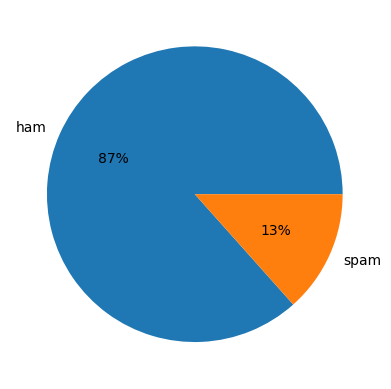

In [17]:
plt.pie(values_df,labels=label_df,autopct='%1.0f%%')


<Axes: xlabel='v1', ylabel='count'>

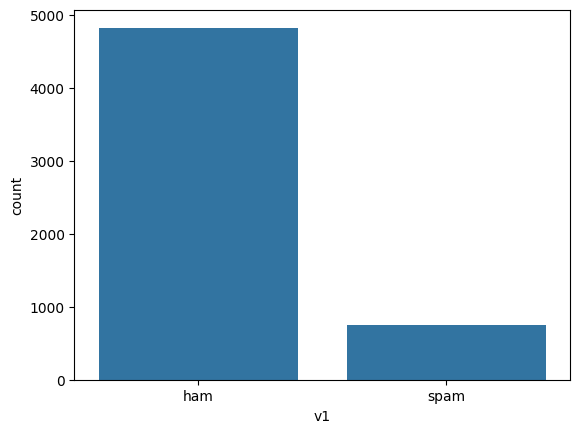

In [18]:
sns.countplot(x=df['v1'])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer=CountVectorizer()

In [23]:
x=vectorizer.fit_transform(df['v2'])

In [24]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 73916 stored elements and shape (5572, 8672)>
  Coords	Values
  (0, 3550)	1
  (0, 8030)	1
  (0, 4350)	1
  (0, 5920)	1
  (0, 2327)	1
  (0, 1303)	1
  (0, 5537)	1
  (0, 4087)	1
  (0, 1751)	1
  (0, 3634)	1
  (0, 8489)	1
  (0, 4476)	1
  (0, 1749)	1
  (0, 2048)	1
  (0, 7645)	1
  (0, 3594)	1
  (0, 1069)	1
  (0, 8267)	1
  (1, 5504)	1
  (1, 4512)	1
  (1, 4318)	1
  (1, 8392)	1
  (1, 5533)	1
  (2, 4087)	1
  (2, 3358)	1
  :	:
  (5570, 4218)	1
  (5570, 8313)	1
  (5570, 1084)	1
  (5570, 4615)	1
  (5570, 7039)	1
  (5570, 3308)	1
  (5570, 7627)	1
  (5570, 1438)	1
  (5570, 5334)	1
  (5570, 2592)	1
  (5570, 8065)	1
  (5570, 1778)	1
  (5570, 7049)	1
  (5570, 2892)	1
  (5570, 3470)	1
  (5570, 1786)	1
  (5570, 3687)	1
  (5570, 4161)	1
  (5570, 903)	1
  (5570, 1546)	1
  (5571, 7756)	1
  (5571, 5244)	1
  (5571, 4225)	2
  (5571, 7885)	1
  (5571, 6505)	1


In [25]:
x.shape

(5572, 8672)

In [27]:
from imblearn.over_sampling import SMOTE

In [32]:
sm=SMOTE(random_state=42)

In [30]:
y=df['v1']

In [35]:
x_res, y_res = sm.fit_resample(x, y)

In [36]:
x_res

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 180975 stored elements and shape (9650, 8672)>

In [37]:
y_res

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
9645,spam
9646,spam
9647,spam
9648,spam


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [40]:
y_res=le.fit_transform(y_res)

In [42]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.33,random_state=42)

In [50]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [52]:
y_pred=clf.predict(x_test)

In [54]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)

0.9682888540031397

In [59]:
from sklearn.metrics import confusion_matrix

In [61]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

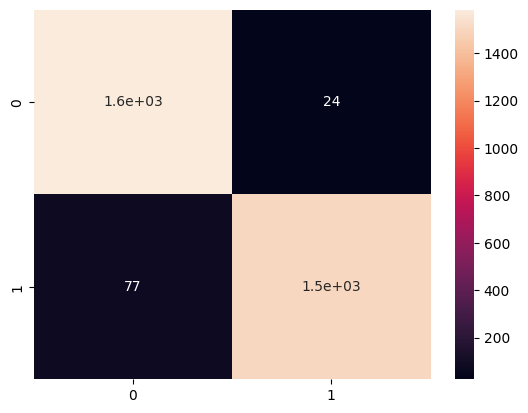

In [62]:
sns.heatmap(cm,annot=True)